## MNIST - Hand Written Digit Classification using ANN,CNN and LeNet with KERAS

### ANN - MNIST hand written Digit Recog without CNN

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
import keras
import warnings
warnings.filterwarnings('ignore')

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
input_shape = (28, 28)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255    

print('X_test.shape:', X_test.shape)
print(X_train.shape[0], 'Train Sample')
print(X_test.shape[0], 'Test Sample')

X_test.shape: (10000, 28, 28)
60000 Train Sample
10000 Test Sample


In [14]:
# Build the ANN model
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(units=128, activation='relu')) 
model.add(Dense(units=num_classes, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=model.fit(X_train,y_train , batch_size=64,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3010 - accuracy: 0.9145 - val_loss: 0.1642 - val_accuracy: 0.9509
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1389 - accuracy: 0.9601 - val_loss: 0.1182 - val_accuracy: 0.9649
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0974 - accuracy: 0.9708 - val_loss: 0.0943 - val_accuracy: 0.9712
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0734 - accuracy: 0.9783 - val_loss: 0.0859 - val_accuracy: 0.9735
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0766 - val_accuracy: 0.9754
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0777 - val_accuracy: 0.9764
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.0702 - val_accuracy: 0.9767
Epoch 

In [16]:
score = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 1s - loss: 0.0828 - accuracy: 0.9752 - 761ms/epoch - 2ms/step
Test loss: 0.08278365433216095
Test accuracy: 0.9751999974250793


In [17]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) 
actual_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


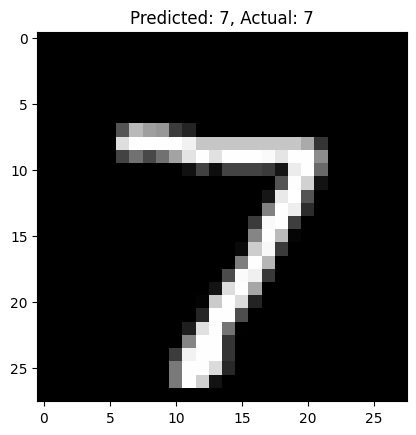

In [18]:
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_classes[0]}, Actual: {actual_classes[0]}")
plt.show()

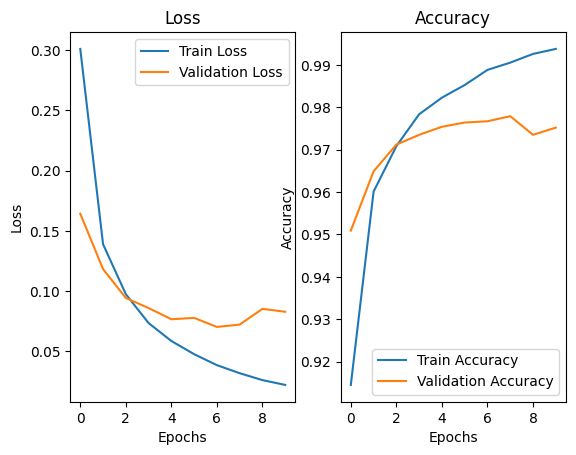

In [19]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### CNN - MNIST hand written Digit Recog

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [29]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('X_test.shape:', X_test.shape)
print(X_train.shape[0], 'Train Samples')
print(X_test.shape[0], 'Test Samples')

X_test.shape: (10000, 28, 28, 1)
60000 Train Samples
10000 Test Samples


In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 33s 68ms/step - loss: 2.2763 - accuracy: 0.1660 - val_loss: 2.2402 - val_accuracy: 0.3940
Epoch 2/10
469/469 [==============================] - 66s 141ms/step - loss: 2.2155 - accuracy: 0.3097 - val_loss: 2.1662 - val_accuracy: 0.5623
Epoch 3/10
469/469 [==============================] - 69s 147ms/step - loss: 2.1359 - accuracy: 0.4158 - val_loss: 2.0628 - val_accuracy: 0.6212
Epoch 4/10
469/469 [==============================] - 69s 148ms/step - loss: 2.0235 - accuracy: 0.4908 - val_loss: 1.9173 - val_accuracy: 0.6625
Epoch 5/10
469/469 [==============================] - 70s 150ms/step - loss: 1.8708 - accuracy: 0.5534 - val_loss: 1.7238 - val_accuracy: 0.7123
Epoch 6/10
469/469 [==============================] - 71s 151ms/step - loss: 1.6767 - accuracy: 0.6043 - val_loss: 1.4893 - val_accuracy: 0.7561
Epoch 7/10
469/469 [==============================] - 68s 144ms/step - loss: 1.4654 - accuracy: 0.6440 - val_loss: 1.2489 - val_acc

In [32]:
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 - 4s - loss: 0.7720 - accuracy: 0.8323 - 4s/epoch - 13ms/step
Test loss: 0.7720388174057007
Test accuracy: 0.8323000073432922


In [33]:
predictions = model.predict(X_test)
print("Predictions shape:", predictions.shape)

313/313 [==============================] - 4s 13ms/step
Predictions shape: (10000, 10)


Prediction for image 5: 1


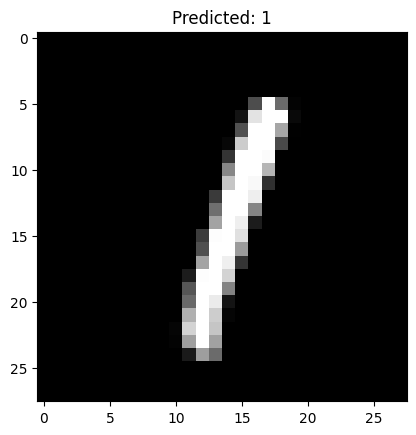

In [34]:
print(f"Prediction for image 5: {np.argmax(predictions[5])}")
plt.imshow(tf.squeeze(X_test[5]), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[5])}")
plt.show()

In [35]:
pred = model.predict(X_test[:5])
print("Predicted classes for the first 5 images:", np.argmax(pred, axis=1))
print("Actual labels for the first 5 images:", np.argmax(y_test[:5], axis=1))

1/1 [==============================] - 0s 68ms/step
Predicted classes for the first 5 images: [7 2 1 0 4]
Actual labels for the first 5 images: [7 2 1 0 4]


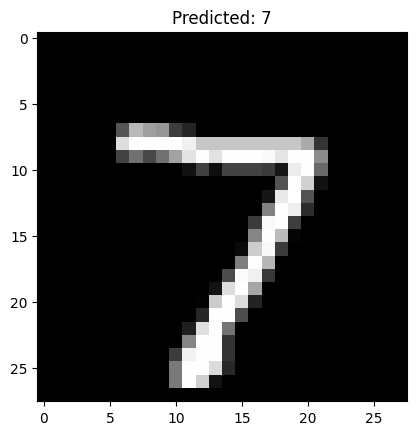

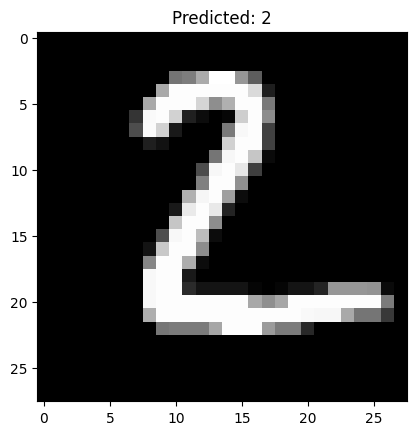

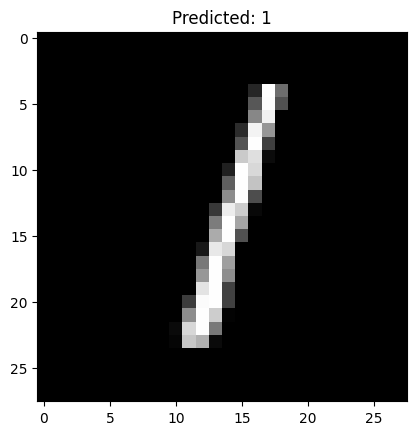

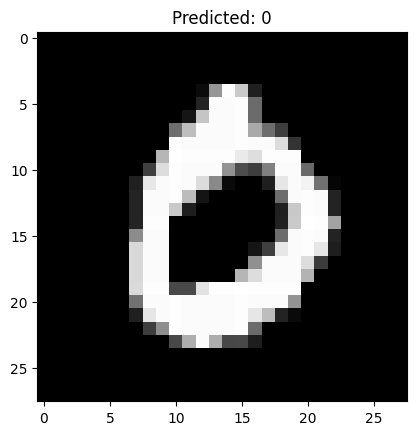

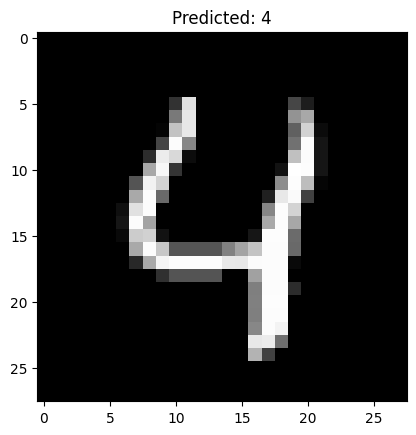

In [36]:
for i in range(5):
    img = X_test[i]
    img = np.array(img, dtype='float')
    pixels = img.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Predicted: {np.argmax(pred[i])}")
    plt.show()

### LeNet-5

In [42]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import resize
import warnings
warnings.filterwarnings('ignore')

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [47]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = tf.image.resize(X_train, [32, 32])
X_test = tf.image.resize(X_test, [32, 32])

X_train = X_train.numpy().astype('float32') / 255
X_test = X_test.numpy().astype('float32') / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(X_train.shape[0], 'Train Samples')
print(X_test.shape[0], 'Test Samples')

60000 Train Samples
10000 Test Samples


In [48]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_2 (Avera  (None, 15, 15, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_3 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_6 (Flatten)         (None, 576)               0         
                                                                 
 dense_13 (Dense)            (None, 120)              

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 14s 21ms/step - loss: 0.3356 - accuracy: 0.9049 - val_loss: 0.1054 - val_accuracy: 0.9672
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0933 - accuracy: 0.9724 - val_loss: 0.0678 - val_accuracy: 0.9798
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0683 - accuracy: 0.9789 - val_loss: 0.0576 - val_accuracy: 0.9827
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0436 - val_accuracy: 0.9859
Epoch 6/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0549 - val_accuracy: 0.9837
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0352 - val_accuracy: 0.988

In [50]:
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 - 2s - loss: 0.0395 - accuracy: 0.9879 - 2s/epoch - 5ms/step
Test loss: 0.03949916362762451
Test accuracy: 0.9879000186920166


In [51]:
predictions = model.predict(X_test[:5])
print("Predicted classes:", np.argmax(predictions, axis=1))
print("True classes:", np.argmax(y_test[:5], axis=1))

1/1 [==============================] - 0s 273ms/step
Predicted classes: [7 2 1 0 4]
True classes: [7 2 1 0 4]


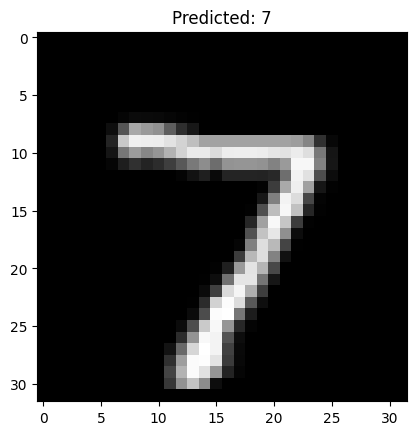

In [52]:
plt.imshow(tf.squeeze(X_test[0]), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()